In [1]:
using Revise
using QuantumCollocation
using NamedTrajectories
using LinearAlgebra
using SparseArrays
using HDF5

Precompiling QuantumCollocation
  ✓ ExactPredicates
  ✓ DelaunayTriangulation
  ✓ Makie
  ✓ SciMLBase → SciMLBaseMakieExt
  ✓ CairoMakie
  ✓ NamedTrajectories
  ✓ QuantumCollocation
  7 dependencies successfully precompiled in 77 seconds. 326 already precompiled.


In [2]:
ω = [4.1405, 3.4637, 4.8001, 4.4153]

δ = [225.78, 100.33, 189.32, 172.15] * 1e-3

g = Symmetric([
    0.0 54.38   6.26  2.73;
    0.0   0.0  52.60 41.12;
    0.0   0.0    0.0  6.01;
    0.0   0.0    0.0   0.0
]) * 1e-3

4×4 Symmetric{Float64, Matrix{Float64}}:
 0.0      0.05438  0.00626  0.00273
 0.05438  0.0      0.0526   0.04112
 0.00626  0.0526   0.0      0.00601
 0.00273  0.04112  0.00601  0.0

In [3]:
csys = MultiTransmonSystem(ω, δ, g; subsystems=[1,2]) 

CompositeQuantumSystem(sparse([2, 4, 3, 5, 2, 3, 5, 7, 6, 8, 5, 7, 6, 8, 9], [2, 2, 3, 3, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9], ComplexF64[-4.252459815899147 + 0.0im, 0.34167961700442595 + 0.0im, -9.135311613667623 + 0.0im, 0.48320794835410397 + 0.0im, 0.34167961700442595 + 0.0im, 0.48320794835410397 + 0.0im, -4.252459815899147 + 0.0im, 0.48320794835410397 + 0.0im, -9.135311613667623 + 0.0im, 0.683359234008852 + 0.0im, 0.48320794835410397 + 0.0im, -1.4186175786550073 + 0.0im, 0.683359234008852 + 0.0im, -5.671077394554155 + 0.0im, -10.55392919232263 + 0.0im], 9, 9), SparseMatrixCSC{ComplexF64, Int64}[sparse([4, 5, 6, 1, 7, 2, 8, 3, 9, 4, 5, 6], [1, 2, 3, 4, 4, 5, 5, 6, 6, 7, 8, 9], ComplexF64[6.283185307179586 + 0.0im, 6.283185307179586 + 0.0im, 6.283185307179586 + 0.0im, 6.283185307179586 + 0.0im, 8.885765876316732 + 0.0im, 6.283185307179586 + 0.0im, 8.885765876316732 + 0.0im, 6.283185307179586 + 0.0im, 8.885765876316732 + 0.0im, 8.885765876316732 + 0.0im, 8.885765876316732 + 0.0im, 8.8857

In [4]:
op = EmbeddedOperator([:H, :H], csys, 1:2)

EmbeddedOperator(ComplexF64[0.4999999999999999 + 0.0im 0.4999999999999999 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.4999999999999999 + 0.0im -0.4999999999999999 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im], [1, 2, 4, 5], [3, 3])

In [17]:
T = 100
Δt = 0.5
# a_guess = h5open("plus_plus_pulse_a_bound_0.03_updated.h5", "r")["a"][:,:]
# Δt = h5open("plus_plus_pulse_a_bound_0.03_updated.h5", "r")["times"][2]
prob = UnitarySmoothPulseProblem(
    csys, 
    op, 
    T, 
    Δt; 
    # prob.trajectory.Δt[end];
    # a_guess=prob.trajectory.a,
    # a_guess=a_guess,
    a_bound=0.05,
    dda_bound=1.0,
    Δt_min=0.05,
    Δt_max=0.6,
)
solve!(prob; max_iter=200)

applying constraint: initial value of Ũ⃗
applying constraint: initial value of a
applying constraint: final value of a
applying constraint: bounds on a
applying constraint: bounds on dda
applying constraint: bounds on Δt
applying constraint: time step all equal constraint
This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:   572248
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:   177185

Total number of variables............................:    17330
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      892
                     variables with only upper bounds:        0
Total number of equality constraints.................:    16929
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality 

In [25]:
unitary_fidelity(prob; subspace=op.subspace_indices)

0.635290106847414

┌ Error: Error watching manifest
│   exception =
│    UndefVarError: `SpecialFunctions` not defined
│    Stacktrace:
│     [1] eval(x::Expr)
│       @ Symbolics.SymbolicsForwardDiffExt ~/.julia/packages/Symbolics/7PRmF/ext/SymbolicsForwardDiffExt.jl:1
│     [2] top-level scope
│       @ ~/.julia/packages/Symbolics/7PRmF/ext/SymbolicsForwardDiffExt.jl:119
│    Revise evaluation error at /home/aaron/.julia/packages/Symbolics/7PRmF/ext/SymbolicsForwardDiffExt.jl:119
│    
│    Stacktrace:
│     [1] methods_by_execution!(recurse::Any, methodinfo::Revise.CodeTrackingMethodInfo, docexprs::Dict{Module, Vector{Expr}}, mod::Module, ex::Expr; mode::Symbol, disablebp::Bool, always_rethrow::Bool, kwargs::@Kwargs{})
│       @ Revise ~/.julia/packages/Revise/FaTes/src/lowered.jl:258
└ @ Revise ~/.julia/packages/Revise/FaTes/src/pkgs.jl:489


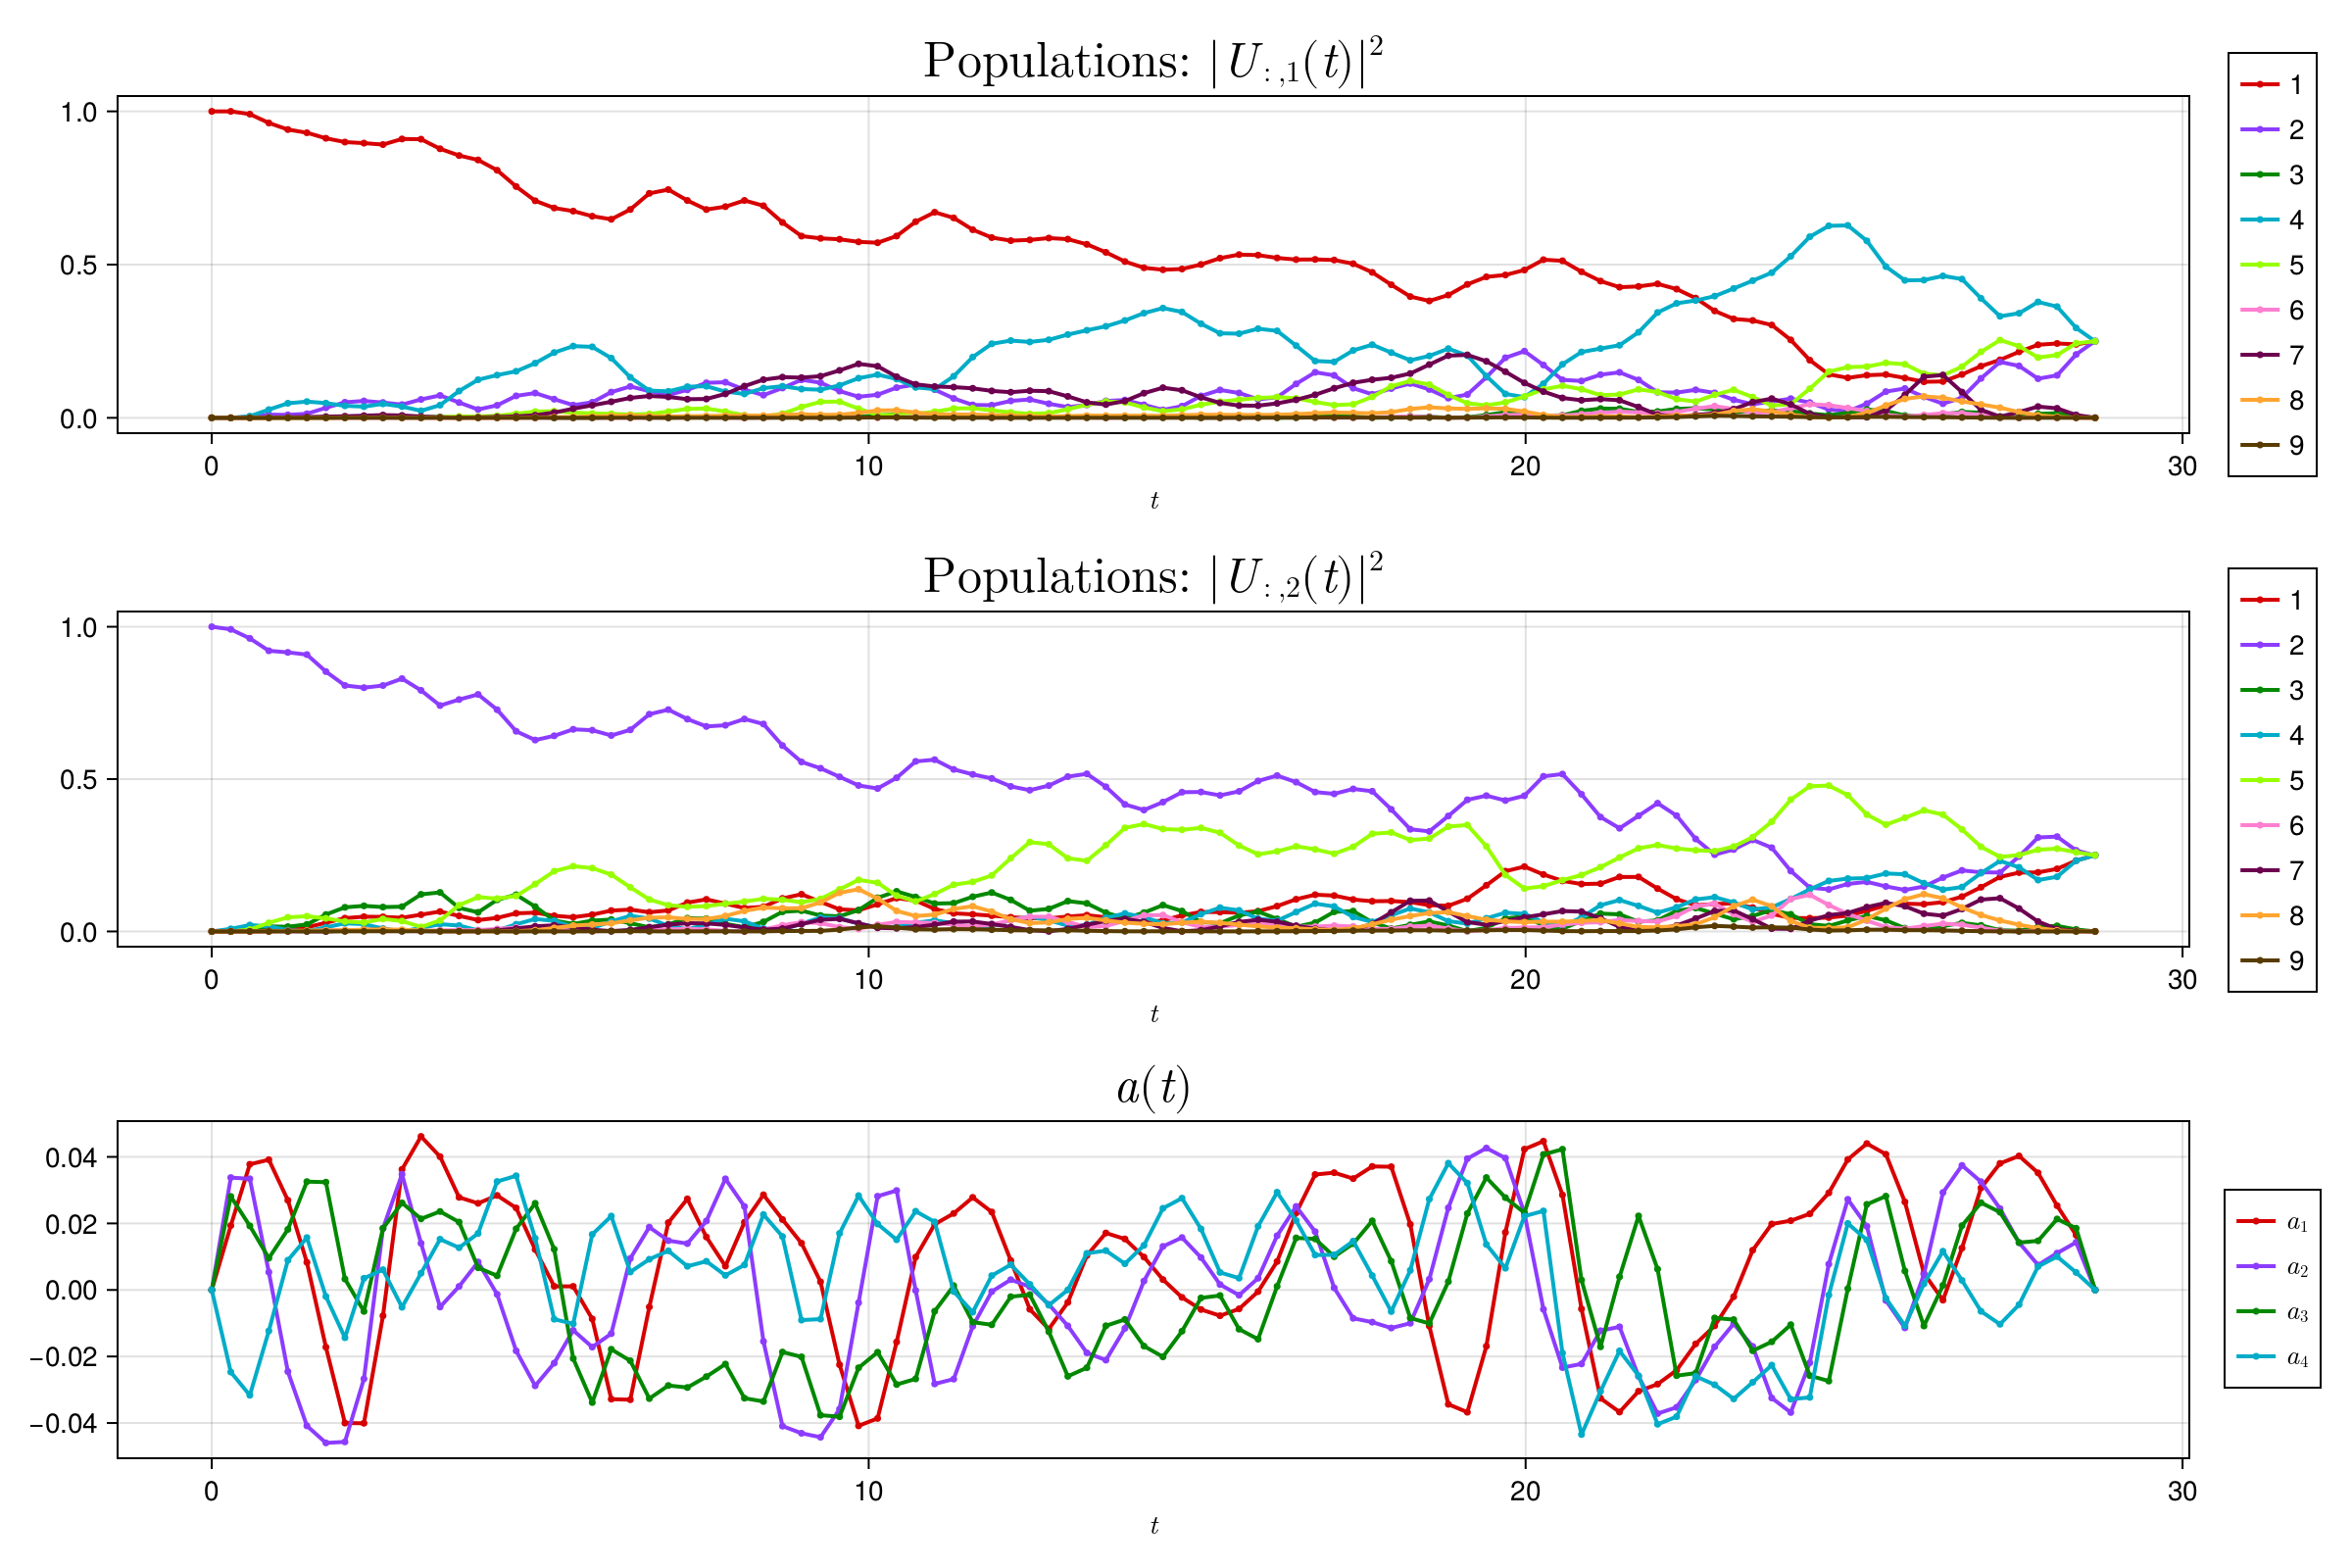

In [19]:
fig = plot_unitary_populations(prob)
save("unitary_populations.png", fig)
fig


In [20]:
csys_full = MultiTransmonSystem(ω, δ, g; levels=4, subsystem_drive_indices=1:2)

CompositeQuantumSystem(sparse([2, 4, 10, 28, 3, 5, 11, 29, 2, 4  …  80, 53, 71, 77, 79, 54, 72, 78, 80, 81], [2, 2, 2, 2, 3, 3, 3, 3, 4, 4  …  78, 79, 79, 79, 79, 80, 80, 80, 80, 81], ComplexF64[1.7266193224129498 + 0.0im, 0.03776194369614931 + 0.0im, 0.2583645798312246 + 0.0im, 0.017153095888600273 + 0.0im, 2.3715882941949347 + 0.0im, 0.053403452916663555 + 0.0im, 0.365382692834144 + 0.0im, 0.02425814084234468 + 0.0im, 0.03776194369614931 + 0.0im, 4.144389028615651 + 0.0im  …  0.07552388739229865 + 0.0im, 0.02425814084234468 + 0.0im, 0.365382692834144 + 0.0im, 0.053403452916663555 + 0.0im, -3.454683777446567 + 0.0im, 0.03430619177720055 + 0.0im, 0.5167291596624493 + 0.0im, 0.07552388739229865 + 0.0im, -1.728064455033617 + 0.0im, -1.0830954832516322 + 0.0im], 81, 81), SparseMatrixCSC{ComplexF64, Int64}[sparse([28, 29, 30, 31, 32, 33, 34, 35, 36, 37  …  45, 46, 47, 48, 49, 50, 51, 52, 53, 54], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  72, 73, 74, 75, 76, 77, 78, 79, 80, 81], ComplexF64[6.28318

In [21]:
op_full = EmbeddedOperator([:H, :H], csys_full, 1:2)

EmbeddedOperator(ComplexF64[0.4999999999999999 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.4999999999999999 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im], [1, 2, 4, 5, 10, 11, 13, 14, 28, 29, 31, 32, 37, 38, 40, 41], [3, 3, 3, 3])

In [22]:
unitary_fidelity(
    op_full.operator, 
    prob.trajectory.a, 
    prob.trajectory.Δt, 
    csys_full; 
    subspace=op_full.subspace_indices
)

0.7103301098921678

In [23]:
ψ = quantum_state("gggg", csys_full)
ψ_goal = op_full.operator * ψ

ψ̃_T = rollout(ψ, prob.trajectory.a, prob.trajectory.Δt, csys_full)[:, end]
ψ_T = iso_to_ket(ψ̃_T)
fidelity(ψ_T, ψ_goal)

0.950659609483475

In [24]:
pulse_save_path = joinpath(@__DIR__, "plus_plus_pulse_a_bound_0.03_updated.h5")

h5open(pulse_save_path, "w") do file
    write(file, "a", prob.trajectory.a)
    write(file, "times", get_times(prob.trajectory))
end

LoadError: HDF5.API.H5Error: Error creating file /home/aaron/projects/JuliaPackages/QuantumCollocation.jl/examples/transmons/plus_plus_pulse_a_bound_0.03_updated.h5
libhdf5 Stacktrace:
 [1] [0m[1mH5F_open[22m: File accessibility/Unable to open file
[90m     unable to truncate a file which is already open[39m
  ⋮

In [ ]:
# test loading the pulse
pulse = h5open(pulse_save_path, "r")
pulse["a"][:,:]
pulse["times"][:]

100-element Vector{Float64}:
  0.0
  0.3146135301223919
  0.6292270602447838
  0.9438405903671757
  1.2584541204895676
  1.5730676506119594
  1.8876811807343512
  2.202294710856743
  2.516908240979135
  2.8315217711015266
  3.1461353012239184
  3.46074883134631
  3.775362361468702
  ⋮
 27.685990650770545
 28.00060418089294
 28.315217711015332
 28.629831241137726
 28.94444477126012
 29.259058301382513
 29.573671831504907
 29.8882853616273
 30.202898891749694
 30.517512421872087
 30.83212595199448
 31.146739482116875

In [ ]:
prob_min_time = UnitaryMinimumTimeProblem(
    prob;
    final_fidelity=0.99,
    D=0.001,
    subspace=op.subspace_indices
)

solve!(prob_min_time; max_iter=50)

applying constraint: initial value of Ũ⃗
applying constraint: initial value of a
applying constraint: final value of a
applying constraint: bounds on a
applying constraint: bounds on dda
applying constraint: bounds on Δt
applying constraint: time step all equal constraint
This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:   572248
Number of nonzeros in inequality constraint Jacobian.:       32
Number of nonzeros in Lagrangian Hessian.............:   177713

Total number of variables............................:    17330
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      892
                     variables with only upper bounds:        0
Total number of equality constraints.................:    16929
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality 

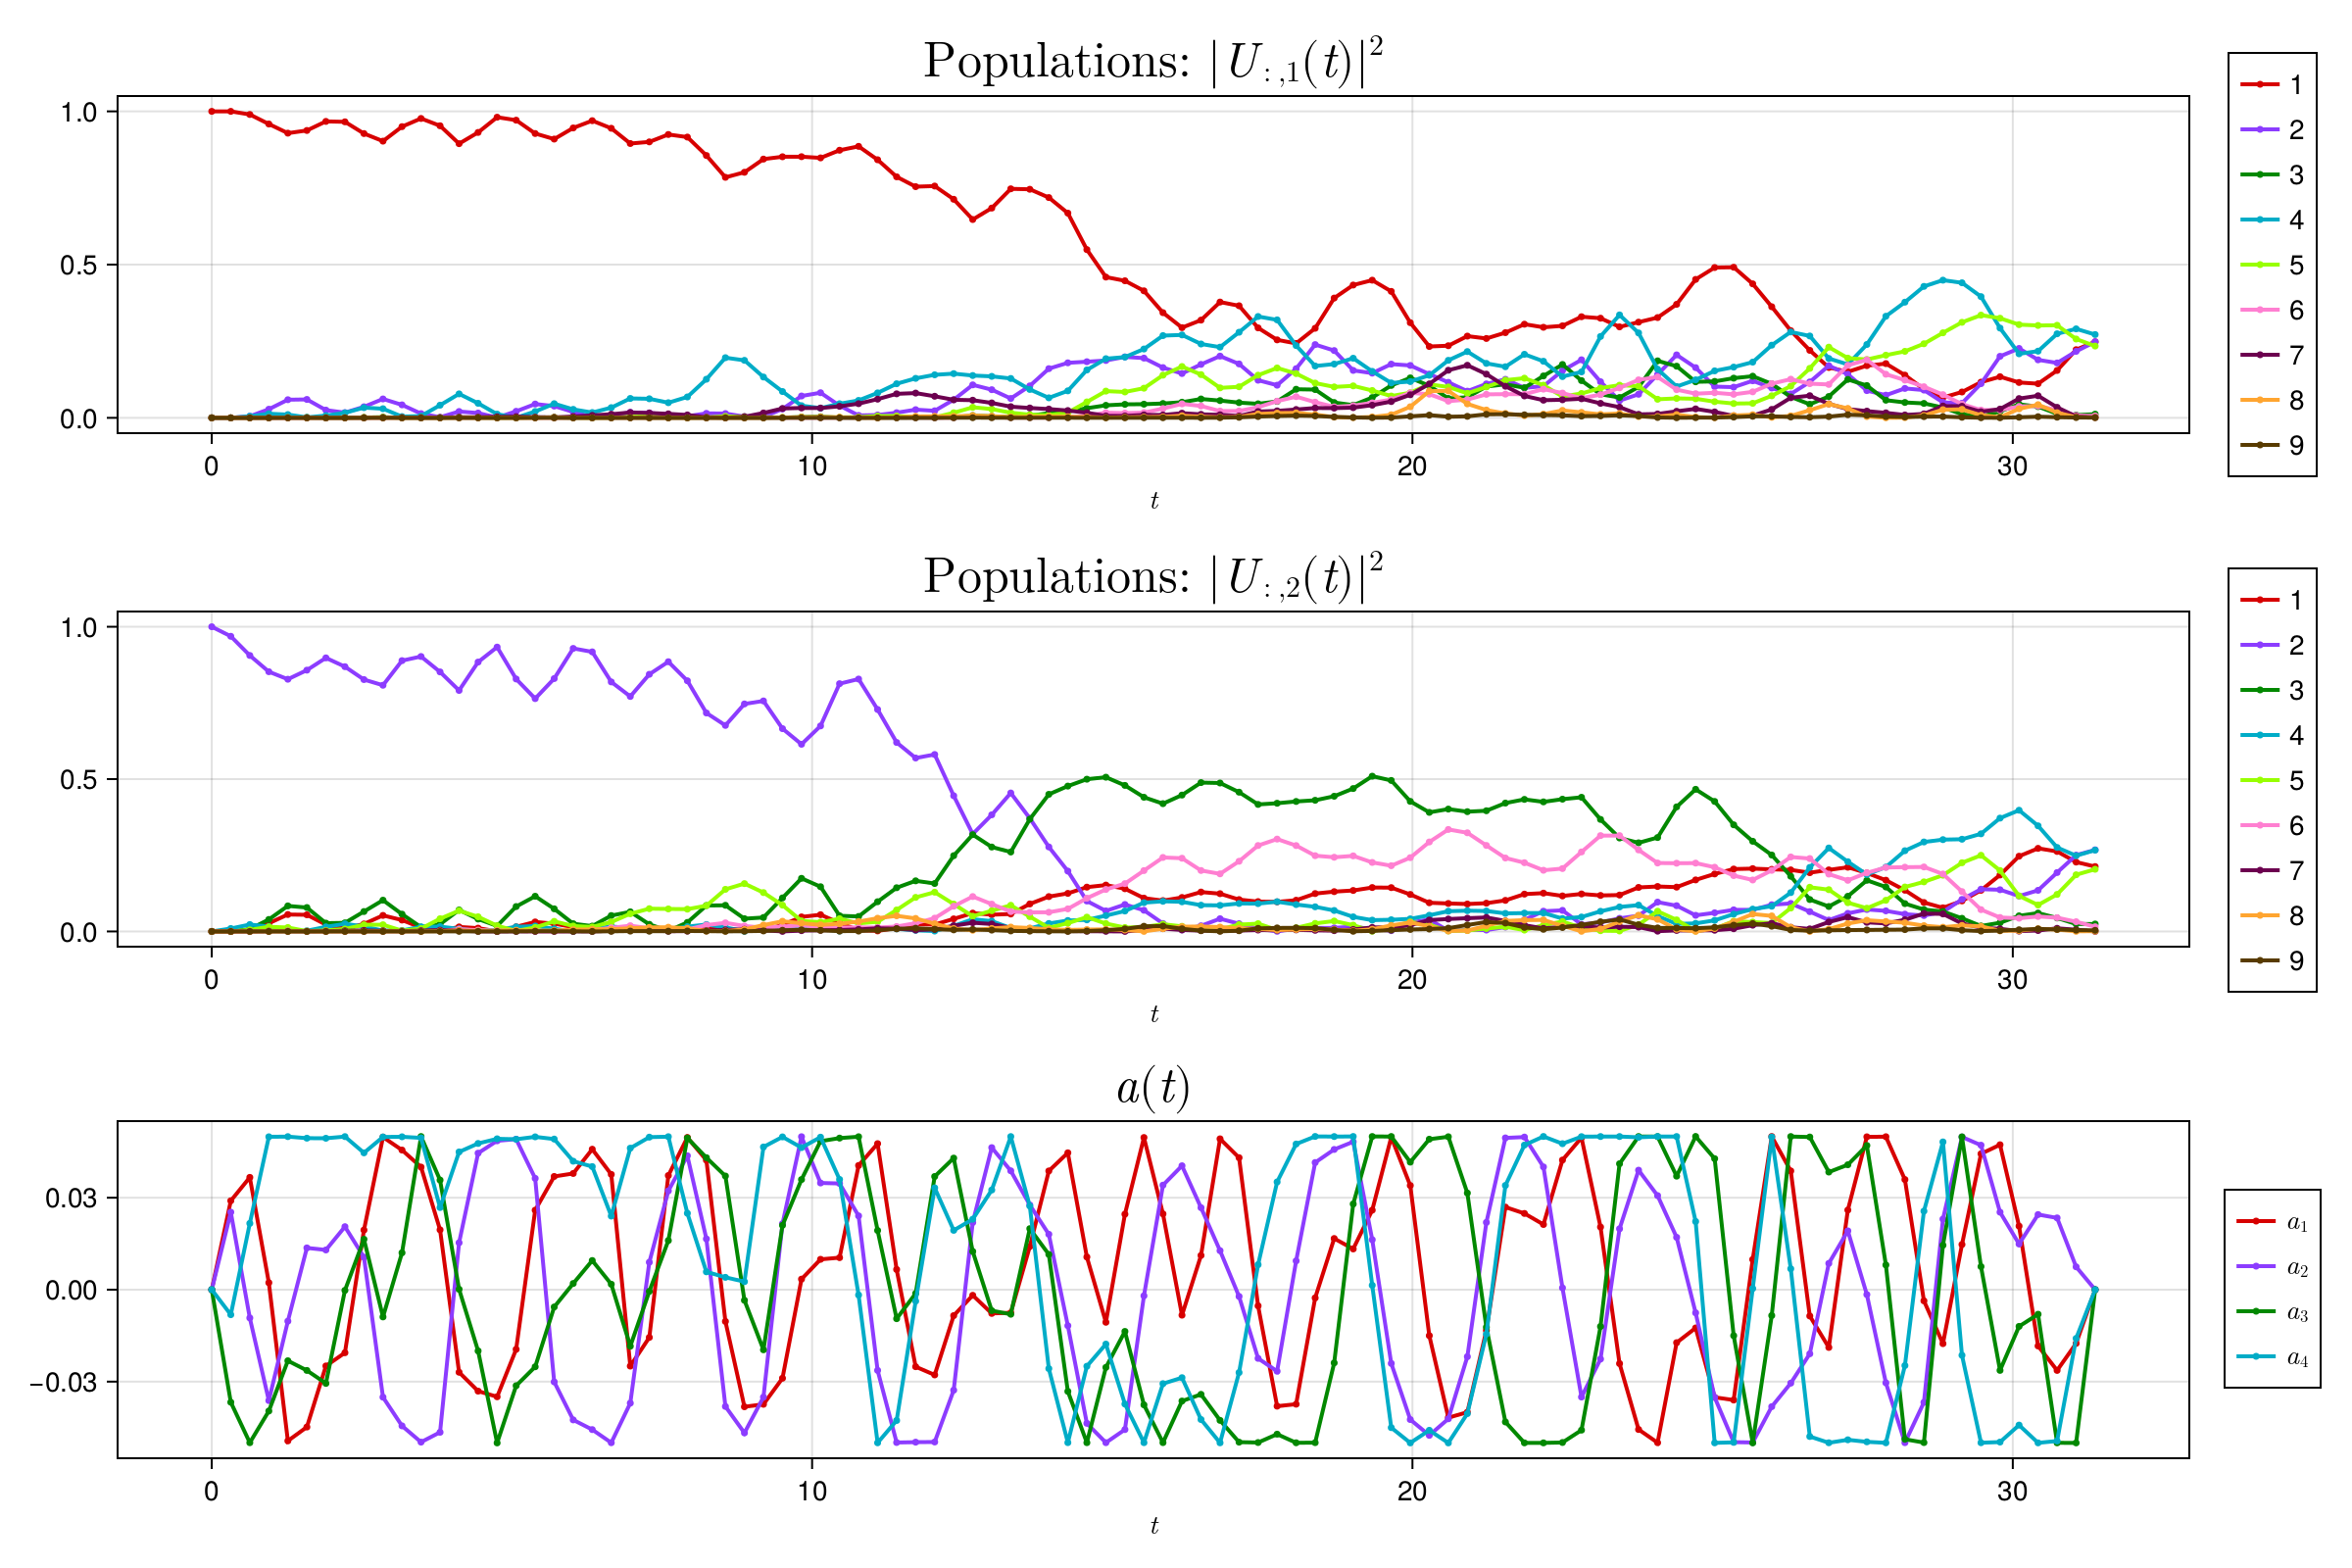

In [ ]:
plot_unitary_populations(prob_min_time)